In [33]:
#Import modules 
import pandas as pd
from datetime import datetime as dt
import numpy as np
import requests, json
from sqlalchemy import create_engine
from configparser import ConfigParser
import psycopg2

In [2]:
#Path to CSV files
zillow_path = "data/original/zillow_data.csv"
unem_path = "data/original/state_unem_rate.csv"

#Read the CSV files to create df
zillow_data = pd.read_csv(zillow_path)
unem_data = pd.read_csv(unem_path)

In [3]:
#Drop columns that we dont need in our database (or that can mess up an axis summation)
d_zillow = zillow_data.drop(columns = ["RegionType","RegionID"])

#Create a list of all columns with housing prices
dates = ['1/31/2017','2/28/2017','3/31/2017','4/30/2017','5/31/2017','6/30/2017','7/31/2017',
         '8/31/2017','9/30/2017','10/31/2017','11/30/2017','12/31/2017','1/31/2018','2/28/2018',
         '3/31/2018','4/30/2018','5/31/2018','6/30/2018','7/31/2018','8/31/2018','9/30/2018',
         '10/31/2018','11/30/2018','12/31/2018','1/31/2019','2/28/2019','3/31/2019','4/30/2019',
         '5/31/2019','6/30/2019','7/31/2019','8/31/2019','9/30/2019','10/31/2019','11/30/2019',
         '12/31/2019','1/31/2020','2/29/2020','3/31/2020','4/30/2020','5/31/2020','6/30/2020',
         '7/31/2020','8/31/2020','9/30/2020','10/31/2020','11/30/2020','12/31/2020','1/31/2021',
         '2/28/2021','3/31/2021','4/30/2021','5/31/2021','6/30/2021','7/31/2021','8/31/2021',
         '9/30/2021','10/31/2021','11/30/2021','12/31/2021'
]

#Create a new column titled 'total' to house the newly added totals and sum the values across using 'axis=1'
d_zillow["Totals"] = d_zillow[dates].sum(axis=1)

#Reset index to create similar column for merge
id_zillow = d_zillow.reset_index()

To make sure we have the correct averages we will be dynamically averaging every column based on how many values were present in the row

In [4]:
#Divide the totals by the amount of rows that contain a value
avg_sum = d_zillow["Totals"].divide((d_zillow.count(axis=1)-4))

#Create a new df for the above values
df = pd.DataFrame(avg_sum, columns = ['Average'])

#Reset index to create similar column for merge
idf = df.reset_index()

#Merge the new dataframe back into our original dataframe
combo_df = pd.merge(id_zillow, idf)
combo_df

,index,SizeRank,RegionName,StateName,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,...,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,Totals,Average
0,0,0,United States,ALL,212615.0,213735.0,214896.0,216137.0,217323.0,218461.0,...,286948.0,292471,298349.0,303739.0,308359.0,312452.0,316333,320662.0,14970538.0,249508.966667
1,1,1,"New York, NY",NY,430417.0,432050.0,434134.0,435828.0,438404.0,440627.0,...,534026.0,541165,549066.0,556634.0,562515.0,567048.0,570588,573813.0,29021798.0,483696.633333
2,2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,599538.0,602599.0,605959.0,607529.0,610712.0,614483.0,...,783767.0,803587,824502.0,837956.0,847074.0,851836.0,859045,868350.0,41403420.0,690057.000000
3,3,3,"Chicago, IL",IL,219234.0,220916.0,222697.0,223977.0,224934.0,225078.0,...,266508.0,270301,274437.0,278525.0,281576.0,284217.0,286894,289595.0,14599266.0,243321.100000
4,4,4,"Dallas-Fort Worth, TX",TX,216427.0,218313.0,219762.0,221407.0,222894.0,224475.0,...,297205.0,304541,312359.0,320271.0,327472.0,333559.0,339033,344919.0,15567695.0,259461.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,929,"Lamesa, TX",TX,61977.0,62657.0,63197.0,63626.0,64004.0,64376.0,...,83934.0,84374,85338.0,86452.0,87499.0,88422.0,88981,90535.0,4412230.0,73537.166667
904,904,930,"Craig, CO",CO,208201.0,209612.0,210569.0,210815.0,210653.0,210110.0,...,226808.0,230257,233337.0,237027.0,240324.0,243306.0,244921,248330.0,12434908.0,210761.152542
905,905,931,"Pecos, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,...,147919.0,149956,152410.0,157488.0,162244.0,166957.0,167995,170763.0,3571269.0,142850.760000
906,906,932,"Vernon, TX",TX,64299.0,64748.0,65064.0,65444.0,65751.0,66073.0,...,74175.0,74851,75570.0,76186.0,76671.0,77011.0,77289,NaN,4059719.0,69995.155172


StateName,AK,AL,USA,AR,AZ,CA,CO,CT,DC,DE,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
index,,,,,,,,,,,,,,,,,,,,,
2017-01-01,292330.75,116201.35,212615.0,93861.90,194601.000000,402884.666667,345369.9375,261110.4,396087.0,222693.0,...,180070.555556,127544.884615,131093.661538,298750.9,174194.833333,218882.00,249496.70,147075.333333,93104.818182,263466.777778
2017-02-01,292763.25,116415.85,213735.0,94135.30,195648.272727,405162.575758,347418.3750,261073.6,398728.0,222601.0,...,181041.444444,128041.807692,131852.815385,300069.2,174746.833333,219063.50,251371.25,147740.583333,93132.363636,263242.333333
2017-03-01,293211.25,116621.05,214896.0,94408.30,196759.363636,407080.606061,349626.7500,261526.0,400128.0,222792.0,...,181932.333333,128655.461538,132452.200000,301694.9,175398.833333,219313.00,253518.95,148400.666667,93214.818182,263021.888889
2017-04-01,293695.25,116983.45,216137.0,94705.95,197761.909091,409077.272727,351866.0625,262122.6,400871.0,222600.5,...,182801.444444,129323.000000,133050.830769,303633.3,176071.166667,219723.75,255854.70,149137.291667,93473.000000,263319.666667
2017-05-01,294328.25,117352.05,217323.0,95087.95,198801.545455,411365.272727,353674.0625,263474.6,400389.0,222784.0,...,183766.888889,130034.461538,133589.492308,305827.2,176690.166667,220695.50,258214.00,149947.333333,93750.818182,263481.666667


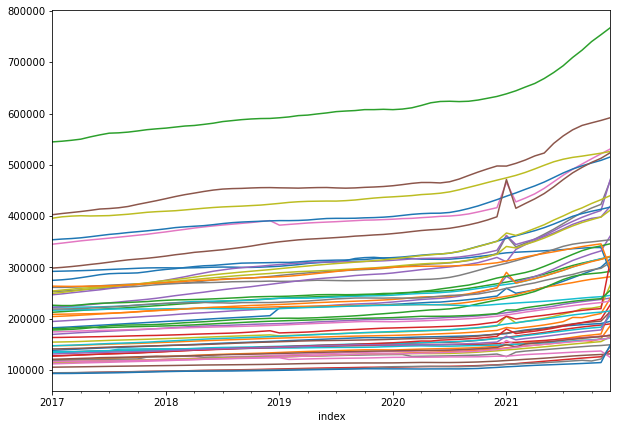

In [21]:
#Remove unwanted columns from the merge
clean_combo = combo_df.drop(columns = ["index"])

#This brings back the region id column that I originally removed to be able to work with the data easier
clean_combo['RegionID']= zillow_data['RegionID'].astype(int)

#Reordering the dataframe for readablity
zillow_final = clean_combo[['StateName','RegionID','SizeRank','RegionName','1/31/2017','2/28/2017','3/31/2017','4/30/2017','5/31/2017','6/30/2017','7/31/2017',
         '8/31/2017','9/30/2017','10/31/2017','11/30/2017','12/31/2017','1/31/2018','2/28/2018',
         '3/31/2018','4/30/2018','5/31/2018','6/30/2018','7/31/2018','8/31/2018','9/30/2018',
         '10/31/2018','11/30/2018','12/31/2018','1/31/2019','2/28/2019','3/31/2019','4/30/2019',
         '5/31/2019','6/30/2019','7/31/2019','8/31/2019','9/30/2019','10/31/2019','11/30/2019',
         '12/31/2019','1/31/2020','2/29/2020','3/31/2020','4/30/2020','5/31/2020','6/30/2020',
         '7/31/2020','8/31/2020','9/30/2020','10/31/2020','11/30/2020','12/31/2020','1/31/2021',
         '2/28/2021','3/31/2021','4/30/2021','5/31/2021','6/30/2021','7/31/2021','8/31/2021',
         '9/30/2021','10/31/2021','11/30/2021','12/31/2021','Totals','Average']]

#Group our data by state and get the average
zillow = zillow_final.groupby("StateName").mean()

#Remove unnecessary columns from the dataframe
zillow = zillow.drop(columns=["RegionID", "SizeRank", "Totals", "Average"])

#Reorganize the date to match our unemployment data format and convert date from string to datetime object
zillow = zillow.transpose()
zillow = zillow.reset_index()
zillow["index"]=pd.to_datetime(zillow["index"])
zillow['index'] = zillow['index'].dt.to_period("M").apply(lambda r: r.start_time)
zillow = zillow.set_index("index")

#Change the header form 'all' to 'usa'
zillow = zillow.rename(columns = {"ALL":"USA"})
zillow.plot(figsize = (10,7),legend=False)
zillow.to_csv("data/zillow.csv")
zillow.head()

In [16]:
#Covert the year and month column into a datetime object to be able to work with in our database
unem_data['Date'] = pd.to_datetime(unem_data[['Year', 'Month']].assign(DAY=1))
unem_data.head()

,FIPS Code,State and area,Year,Month,Civilian non-institutional population,Total,Percent of population,EmploymentTotal,Percent of population.1,UnemploymentTotal,UnemploymentRate,Date
0,1,Alabama,2017,1,"3,878,820","2,186,081",56.4,"2,054,464",53.0,"131,617",6.0,2017-01-01
53,1,Alabama,2017,2,"3,880,377","2,195,667",56.6,"2,071,956",53.4,"123,711",5.6,2017-02-01
106,1,Alabama,2017,3,"3,882,073","2,199,288",56.7,"2,089,518",53.8,"109,770",5.0,2017-03-01
159,1,Alabama,2017,4,"3,883,878","2,202,139",56.7,"2,108,072",54.3,"94,067",4.3,2017-04-01
212,1,Alabama,2017,5,"3,885,734","2,195,532",56.5,"2,105,456",54.2,"90,076",4.1,2017-05-01


In [7]:
#Sort data for better readability in the pivot below 
unem_data = unem_data.sort_values(["State and area", "Date"])

State and area,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,6.0,7.5,5.4,4.4,5.7,3.1,5.2,5.2,6.7,4.9,...,3.6,5.0,5.0,3.4,3.6,4.4,5.5,6.4,3.9,5.5
2017-02-01,5.6,7.4,5.1,4.4,5.5,2.9,5.1,5.1,6.6,4.5,...,3.7,4.6,5.0,3.6,3.6,4.2,5.3,6.3,4.0,5.0
2017-03-01,5.0,7.0,4.9,3.6,5.2,2.4,4.7,4.7,6.1,4.3,...,3.3,4.1,4.6,3.4,3.5,4.0,4.9,5.7,3.6,4.8
2017-04-01,4.3,6.6,4.7,3.2,4.7,2.3,4.2,4.3,5.5,4.0,...,3.1,3.4,4.2,3.1,3.3,3.5,4.3,4.9,3.1,4.2
2017-05-01,4.1,6.3,4.8,3.6,4.4,2.3,4.4,4.2,5.7,4.1,...,2.9,3.2,4.2,3.0,2.9,3.7,4.3,4.6,3.1,4.1


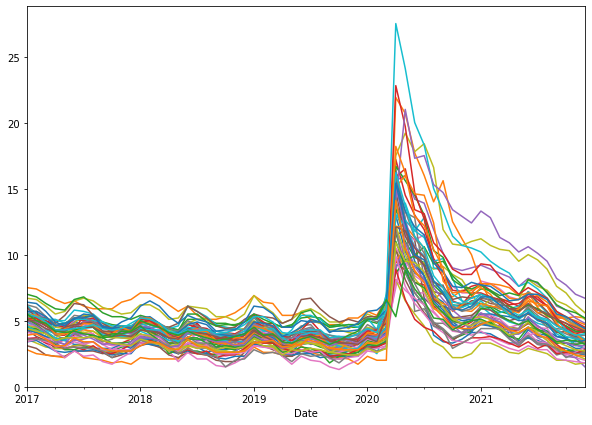

In [24]:
#Re-arrange our data to better fit with the zillow data above
pivot = pd.pivot_table(unem_data, values= "UnemploymentRate",
                    index="Date", columns='State and area',aggfunc=np.sum)
pivot.plot(figsize = (10,7),legend=False)
pivot.to_csv("data/unemployment_pivot.csv")
pivot.head()

In [42]:
#Import state table from github listed below
url = "https://gist.githubusercontent.com/mshafrir/2646763/raw/8b0dbb93521f5d6889502305335104218454c2bf/states_titlecase.json"
data = requests.get(url)
abbrv = pd.DataFrame(json.loads(data.text))
abbrv = abbrv.rename(columns = {"name":"states"})
abbrv.to_csv("data/state_abbreviations.csv")
abbrv.head()

,states,abbreviation
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [38]:
#Connecting to our database server
rds_connection_string = "postgres:postgres@localhost:5432/housing_unemployment"

#Create a reference for sql library
engine = create_engine(f'postgresql://{rds_connection_string}')

#Attach the data frame to the sql
zillow.to_sql(name = 'housing_data', con = engine , if_exists = "replace" , index = True)

#Show the complete data
pd.read_sql_query('SELECT * FROM housing_data', con = engine)

,index,AK,AL,USA,AR,AZ,CA,CO,CT,DC,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2017-01-01,292330.75,116201.350000,212615.0,93861.900000,194601.000000,402884.666667,345369.937500,261110.4,396087.0,...,180070.555556,127544.884615,131093.661538,298750.9,174194.833333,218882.00,249496.700000,147075.333333,93104.818182,263466.777778
1,2017-02-01,292763.25,116415.850000,213735.0,94135.300000,195648.272727,405162.575758,347418.375000,261073.6,398728.0,...,181041.444444,128041.807692,131852.815385,300069.2,174746.833333,219063.50,251371.250000,147740.583333,93132.363636,263242.333333
2,2017-03-01,293211.25,116621.050000,214896.0,94408.300000,196759.363636,407080.606061,349626.750000,261526.0,400128.0,...,181932.333333,128655.461538,132452.200000,301694.9,175398.833333,219313.00,253518.950000,148400.666667,93214.818182,263021.888889
3,2017-04-01,293695.25,116983.450000,216137.0,94705.950000,197761.909091,409077.272727,351866.062500,262122.6,400871.0,...,182801.444444,129323.000000,133050.830769,303633.3,176071.166667,219723.75,255854.700000,149137.291667,93473.000000,263319.666667
4,2017-05-01,294328.25,117352.050000,217323.0,95087.950000,198801.545455,411365.272727,353674.062500,263474.6,400389.0,...,183766.888889,130034.461538,133589.492308,305827.2,176690.166667,220695.50,258214.000000,149947.333333,93750.818182,263481.666667
5,2017-06-01,295174.50,117685.600000,218461.0,95439.400000,199772.000000,413925.121212,355412.250000,264178.2,400718.0,...,182169.400000,130732.423077,134128.830769,307829.5,177163.333333,221760.50,260324.950000,150743.416667,93998.727273,263835.777778
6,2017-07-01,296008.00,118026.400000,219456.0,95873.900000,200536.363636,414882.303030,357157.562500,265328.8,401099.0,...,182970.300000,131472.115385,134626.415385,310206.9,177543.583333,222702.50,262343.050000,151528.166667,94274.727273,264189.111111
7,2017-08-01,296769.75,118052.428571,220454.0,96229.250000,201317.909091,416400.878788,359045.062500,266186.2,402440.0,...,183591.900000,132136.884615,135077.123077,312620.3,177968.583333,223875.00,264389.850000,152219.833333,94593.454545,264857.555556
8,2017-09-01,297535.25,118524.857143,221546.0,96540.450000,202257.363636,418924.909091,360899.750000,267190.8,403795.0,...,184151.900000,132856.307692,135417.461538,314777.4,178517.833333,225194.25,265996.650000,152790.666667,95033.909091,265884.111111
9,2017-10-01,298342.25,118912.000000,222750.0,96805.400000,203312.272727,422954.242424,362832.500000,267868.8,405660.0,...,184579.400000,133544.576923,135811.246154,316374.2,179163.416667,226783.50,267890.300000,153424.875000,95486.909091,267067.666667


In [40]:
#Connecting to our database server
rds_connection_string = "postgres:postgres@localhost:5432/housing_unemployment"

#Create a reference for sql library
engine = create_engine(f'postgresql://{rds_connection_string}')

#Attach the data frame to the sql
pivot.to_sql(name = 'unemployment_data', con = engine , if_exists = "replace" , index = True)

#Show the complete data
pd.read_sql_query('SELECT * FROM unemployment_data', con = engine)

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2017-01-01,6.0,7.5,5.4,4.4,5.7,3.1,5.2,5.2,6.7,...,3.6,5.0,5.0,3.4,3.6,4.4,5.5,6.4,3.9,5.5
1,2017-02-01,5.6,7.4,5.1,4.4,5.5,2.9,5.1,5.1,6.6,...,3.7,4.6,5.0,3.6,3.6,4.2,5.3,6.3,4.0,5.0
2,2017-03-01,5.0,7.0,4.9,3.6,5.2,2.4,4.7,4.7,6.1,...,3.3,4.1,4.6,3.4,3.5,4.0,4.9,5.7,3.6,4.8
3,2017-04-01,4.3,6.6,4.7,3.2,4.7,2.3,4.2,4.3,5.5,...,3.1,3.4,4.2,3.1,3.3,3.5,4.3,4.9,3.1,4.2
4,2017-05-01,4.1,6.3,4.8,3.6,4.4,2.3,4.4,4.2,5.7,...,2.9,3.2,4.2,3.0,2.9,3.7,4.3,4.6,3.1,4.1
5,2017-06-01,4.9,6.5,5.2,3.9,4.9,2.7,4.5,4.7,6.5,...,3.0,4.1,4.6,3.4,3.0,3.7,4.4,5.2,3.7,4.2
6,2017-07-01,4.7,6.1,5.3,4.1,5.2,2.7,4.7,4.8,6.7,...,2.8,3.9,4.5,3.2,2.9,3.7,4.5,5.2,3.4,4.0
7,2017-08-01,4.5,5.9,5.3,3.9,5.1,2.7,4.6,4.8,6.5,...,3.1,3.6,4.5,3.4,2.9,3.8,4.7,5.4,3.4,3.9
8,2017-09-01,3.9,5.9,4.9,3.5,4.5,2.5,4.1,4.2,6.0,...,2.6,3.2,4.1,2.8,2.7,3.5,4.4,4.5,2.9,3.7
9,2017-10-01,3.8,5.9,4.7,3.2,4.3,2.6,4.0,4.0,5.8,...,2.5,3.3,3.8,2.8,2.2,3.3,4.3,4.4,2.7,3.8


In [43]:
#Connecting to our database server
rds_connection_string = "postgres:postgres@localhost:5432/housing_unemployment"

#Create a reference for sql library
engine = create_engine(f'postgresql://{rds_connection_string}')

#Attach the data frame to the sql
abbrv.to_sql(name = 'state_abbreviations', con = engine , if_exists = "replace" , index = False)

#Show the complete data
pd.read_sql_query('SELECT * FROM state_abbreviations', con = engine)

,states,abbreviation
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,Delaware,DE
9,District Of Columbia,DC
